# Árvore 2-3-4 (Árvore B de Ordem 4)

A **Árvore 2-3-4** é uma estrutura de dados do tipo árvore de busca balanceada, mais especificamente uma B-Tree de ordem 4. Ela é uma árvore auto-balanceável que garante que todas as folhas estejam sempre na mesma profundidade, proporcionando operações de busca, inserção e remoção com complexidade de tempo **O(log n)**.

## O Que Torna a Árvore 2-3-4 Especial?

Diferente de uma árvore binária tradicional onde cada nó possui no máximo 2 filhos, a árvore 2-3-4 permite que os nós tenham **até 4 filhos** e armazenem **até 3 chaves de dados**. Essa flexibilidade permite um melhor balanceamento e reduz a altura da árvore.

## Tipos de Nós

Os nós são classificados de acordo com o número de chaves que contêm. O número de filhos de um nó é sempre igual ao número de chaves + 1:

### 1. 2-nó (2-node)
- Contém **1 chave**
- Possui **2 filhos** (se não for folha)
- Funciona exatamente como um nó de árvore binária padrão
- **Estrutura:** `[ A ]`
- **Filhos:**
  - Esquerda: valores < A
  - Direita: valores > A

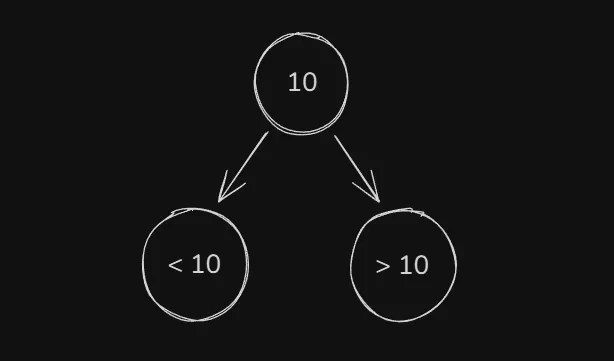

### 2. 3-nó (3-node)
- Contém **2 chaves**
- Possui **3 filhos** (se não for folha)
- **Estrutura:** `[ A | B ]` onde A < B
- **Filhos:**
  1. Valores < A
  2. Valores entre A e B
  3. Valores > B

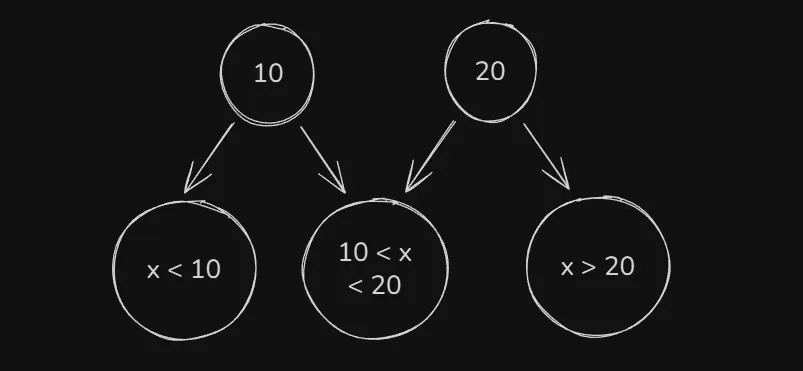

### 3. 4-nó (4-node)
- Contém **3 chaves**
- Possui **4 filhos** (se não for folha)
- **Estrutura:** `[ A | B | C ]` onde A < B < C
- **Filhos:**
  1. Valores < A
  2. Valores entre A e B
  3. Valores entre B e C
  4. Valores > C

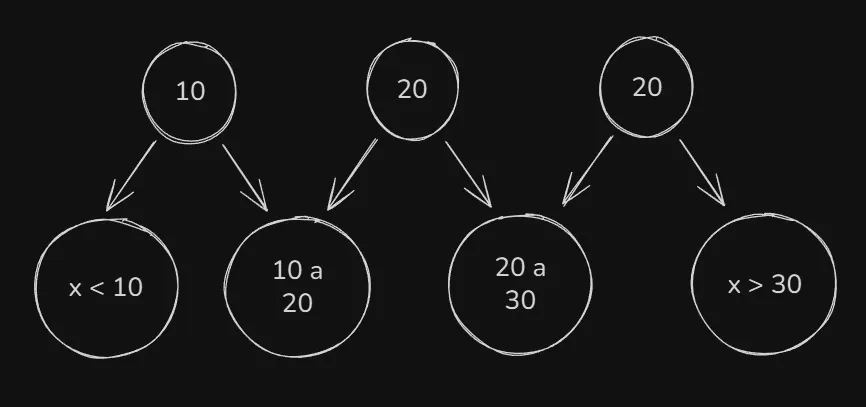

## Propriedades Principais

A Árvore 2-3-4 mantém as seguintes propriedades invariantes:

1. **Balanceamento Perfeito:** Todas as folhas (nós externos) estão sempre no mesmo nível (mesma profundidade). Isso garante que o pior caso de busca seja O(log n).

2. **Ordenação:** Assim como em árvores binárias de busca, percorrer a árvore em ordem simétrica (in-order traversal) produz os elementos em ordem crescente.

3. **Crescimento Vertical:** A árvore cresce "para cima". Quando a raiz precisa ser dividida, a altura da árvore aumenta em 1 unidade.

4. **Capacidade dos Nós:** Cada nó interno pode ter 2, 3 ou 4 filhos (nunca 1 ou mais de 4).

5. **Chaves Ordenadas:** Dentro de cada nó, as chaves estão sempre ordenadas da esquerda para a direita.

## Operações Fundamentais

### 1. Busca (Search)

A busca é similar à de uma árvore binária, mas com mais comparações dentro de cada nó:

1. Começamos na raiz
2. Em cada nó, comparamos o valor buscado com as chaves presentes (1, 2 ou 3 chaves)
3. Determinamos qual filho seguir baseado nas comparações
4. Repetimos até encontrar o valor ou chegar a uma folha (valor não existe)

**Complexidade:** O(log n)

### 2. Inserção (Insertion)

A inserção é a operação mais interessante da Árvore 2-3-4. Ela sempre ocorre nas **folhas**.

#### Processo de Inserção:

1. **Descida:** Começamos na raiz e descemos até encontrar a folha apropriada
2. **Inserção Simples:** Se a folha for um 2-nó ou 3-nó (tem espaço), simplesmente adicionamos a chave mantendo a ordem
3. **Splitting (Divisão):** Se a folha for um 4-nó (está cheia), precisamos dividir o nó

#### Estratégia de Split (Top-Down):

Para evitar complicações, utilizamos a estratégia **preemptiva**:
- Durante a descida, **dividimos qualquer 4-nó que encontramos ANTES de entrar nele**
- Isso garante que o pai de um nó nunca estará cheio quando precisarmos fazer um split
- Evita a propagação em cascata de splits para cima

#### Como Funciona o Split de um 4-nó:

Dado um 4-nó `[A | B | C]`:
1. O elemento do meio (B) **sobe** para o nó pai
2. Os elementos A e C formam **dois novos 2-nós**
3. Os 4 filhos são redistribuídos entre os dois novos nós

**Complexidade:** O(log n)

### 3. Remoção (Deletion)

A remoção é a operação mais complexa, pois precisa garantir que nenhum nó fique vazio (underflow).

#### Casos de Remoção:

**Caso 1: Chave em Folha com Múltiplas Chaves**
- Simplesmente removemos a chave
- Nada mais precisa ser feito

**Caso 2: Chave em Nó Interno**
- Substituímos a chave pelo seu **predecessor** (maior valor da subárvore esquerda) ou **sucessor** (menor valor da subárvore direita)
- Removemos o predecessor/sucessor de sua folha

**Caso 3: Remoção Causa Underflow**
- Se remover uma chave deixa um nó com 0 chaves, temos um problema
- **Solução 1 - Empréstimo (Transfer):** Se um irmão adjacente tem chaves extras, "emprestamos" uma chave através do pai
- **Solução 2 - Fusão (Merge):** Se os irmãos também estão no mínimo, fundimos o nó com um irmão e uma chave do pai

**Complexidade:** O(log n)